# 1. Linear Regression Basic

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])
print(x_data)
print(y_data)

tensor([1., 2., 3., 4., 5.])
tensor([ 2.,  4.,  6.,  8., 10.])


In [49]:
x = x_data.view(len(x_data), 1)
y = y_data.view(len(y_data), 1)

print("x: ", x)
print("y: ", y)

x:  tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
y:  tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


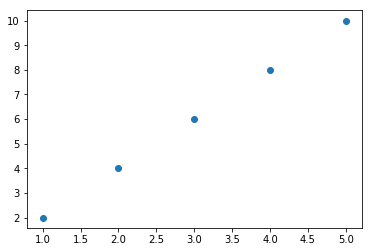

In [50]:
plt.scatter(x_data.numpy(), y_data.numpy())
plt.show()

# Normal Equation

In [51]:
xtx = torch.mm(x.t(), x)
xtx_inv = xtx.inverse()
xtx_inv_xt = torch.mm(xtx_inv, x.t())

w = torch.mm(xtx_inv_xt, y)
print(w.item(), w * x)

1.9999998807907104 tensor([[ 2.0000],
        [ 4.0000],
        [ 6.0000],
        [ 8.0000],
        [10.0000]])


In [52]:
w = torch.rand(1, 1)
w.item()

0.19610923528671265

# without torch.optim

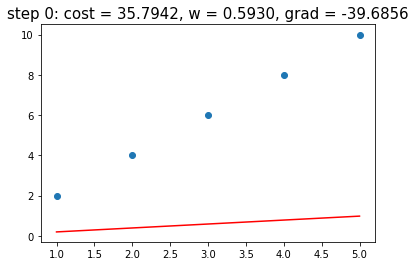

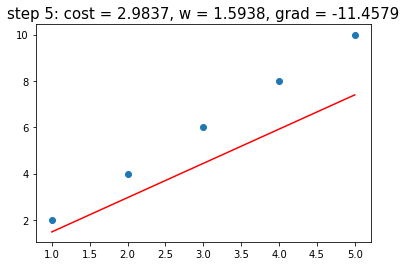

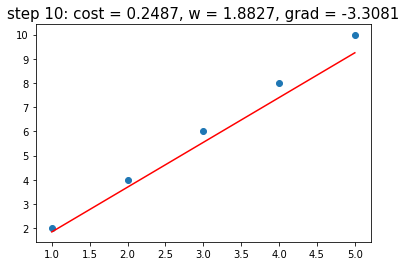

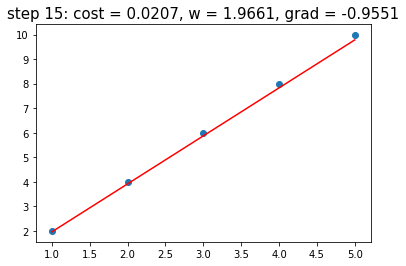

In [53]:
lr = 0.01

for step in range(20):
    pre = w * x
    cost = ((pre - y) ** 2).sum() / len(x)
    #(wx-y)^2 미분 시 2(wx-y)*x
    grad = 2 * (pre - y).view(len(x_data)).dot(x.view(len(x_data))) / len(x)
    w -= lr * grad
    
    if step % 5 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')
        plt.title('step %d: cost = %.4f, w = %.4f, grad = %.4f' % (step, cost.item(), w.item(), grad.item()),
                 fontdict={'size': 15})
        plt.show()

In [54]:
test_x = torch.Tensor([6])
test_y = w * test_x
test_y.item()

11.924793243408203

# Define Model with nn.Linear, torch.optim

In [66]:
model = nn.Linear(1, 1, bias=False)
model.weight

Parameter containing:
tensor([[0.9243]], requires_grad=True)

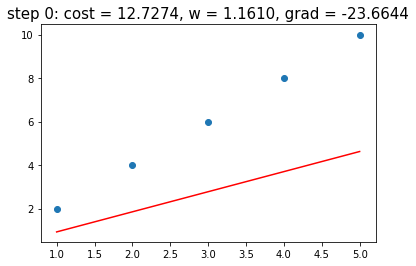

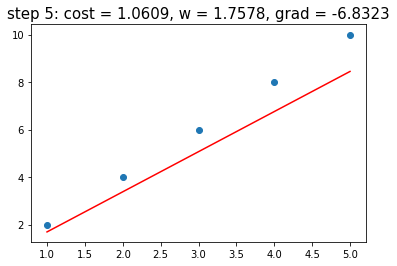

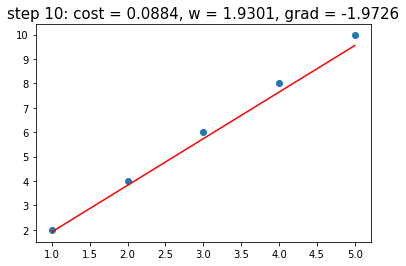

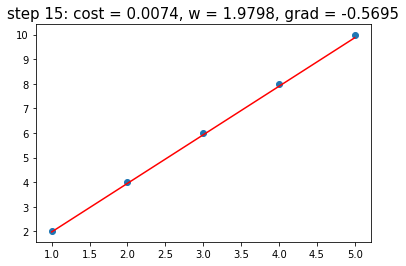

In [67]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

for step in range(20):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')
        plt.title('step %d: cost = %.4f, w = %.4f, grad = %.4f' % 
                  (step, cost.item(), model.weight.item(), model.weight.grad.item()), 
                 fontdict={'size': 15})
        plt.show()

In [68]:
test_x = torch.Tensor([6])
test_y = model(test_x)
test_y.item()

11.955154418945312